### import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import folium
from folium.plugins import HeatMap

from scipy import stats

### load data

In [2]:
df = pd.read_csv('/content/USA_ACCIDENTS.csv')

### Data exploration and cleaning

In [3]:
df.head()

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
0,0,A-1,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9
1,1,A-2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9
2,2,A-3,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0
3,3,A-4,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1
4,4,A-5,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0


In [4]:
df.sample(5)

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
610167,610167,A-618083,2022-05-18 18:58:02,33.821655,-84.251907,Clarkston,GA,84.0
980516,980516,A-990282,2021-06-25 14:20:36,38.991859,-93.567284,Concordia,MO,85.0
86165,86165,A-86172,2016-08-03 09:40:00,32.649334,-117.101974,National City,CA,77.0
133250,133250,A-133257,2016-10-03 12:31:12,27.496031,-82.628494,Bradenton,FL,88.0
246982,246982,A-246989,2016-09-23 18:12:20,38.839653,-76.866623,Upper Marlboro,MD,86.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990214 entries, 0 to 990213
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      990214 non-null  int64  
 1   ID              990214 non-null  object 
 2   Start_Time      990214 non-null  object 
 3   Start_Lat       990214 non-null  float64
 4   Start_Lng       990213 non-null  float64
 5   City            990185 non-null  object 
 6   State           990213 non-null  object 
 7   Temperature(F)  975037 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 60.4+ MB


In [6]:
df.describe()

,Unnamed: 0,Start_Lat,Start_Lng,Temperature(F)
count,990214.000000,990214.000000,990213.000000,975037.000000
mean,495106.500000,36.057077,-94.786768,64.503178
std,285850.304066,4.907822,17.401707,17.468178
min,0.000000,24.554800,-124.497414,-77.800000
25%,247553.250000,32.924831,-117.385582,54.000000
50%,495106.500000,35.249840,-87.967255,66.900000
75%,742659.750000,40.113232,-80.926178,77.000000
max,990213.000000,48.998085,-68.160789,196.000000


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Start_Time,0
Start_Lat,0
Start_Lng,1
City,29
State,1
Temperature(F),15177


In [8]:
(df.isnull().sum() / len(df)) * 100

,0
Unnamed: 0,0.000000
ID,0.000000
Start_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000101
City,0.002929
State,0.000101
Temperature(F),1.532699


In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.drop_duplicates()

In [12]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
# outliers

### Data analysis

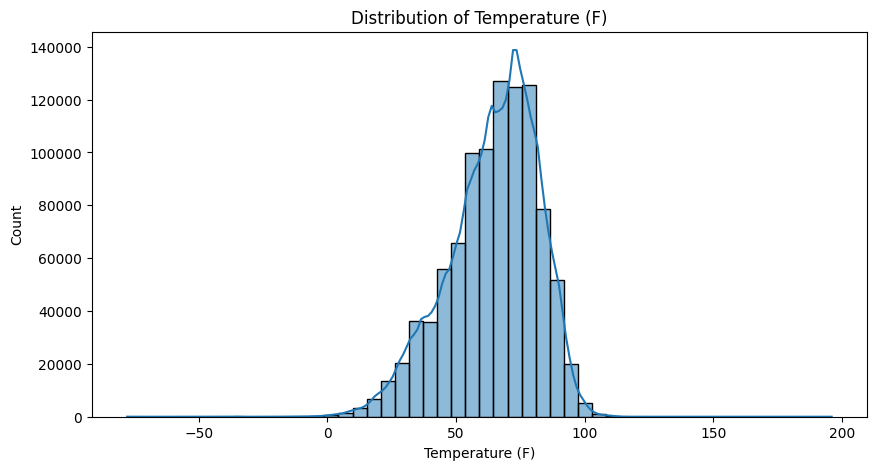

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['Temperature(F)'].dropna(), bins=50, kde=True)
plt.title("Distribution of Temperature (F)")
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.show()

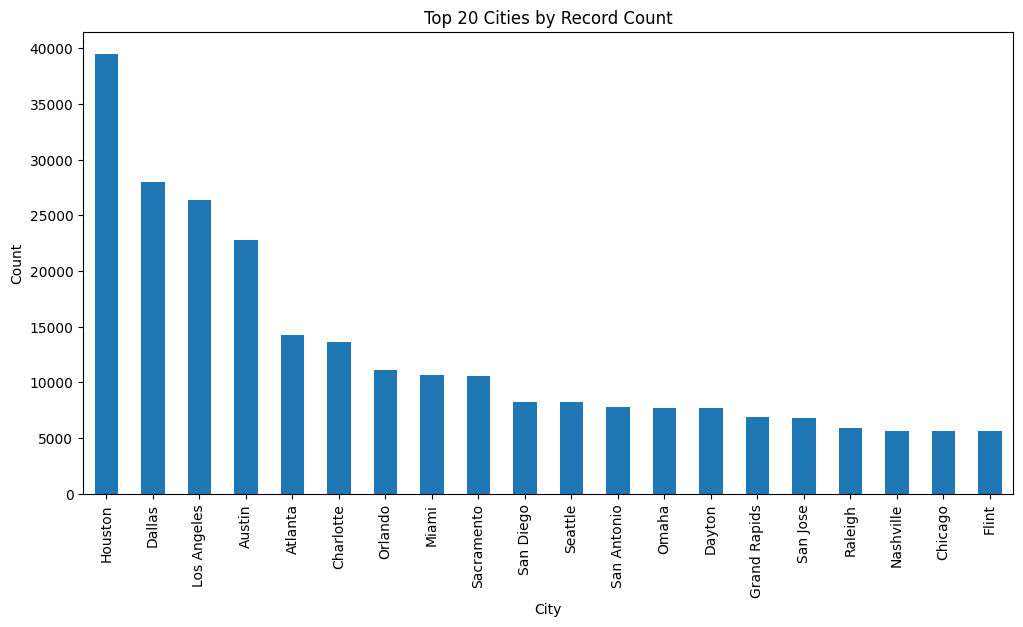

In [14]:
plt.figure(figsize=(12,6))
df['City'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Cities by Record Count")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


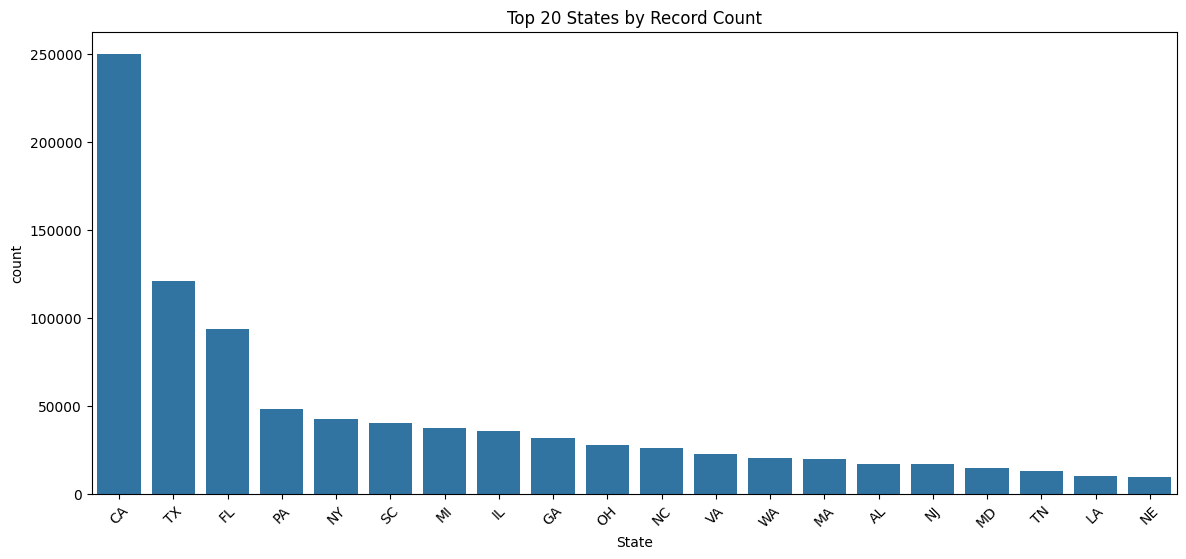

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="State", order=df['State'].value_counts().index[:20])
plt.title("Top 20 States by Record Count")
plt.xticks(rotation=45)
plt.show()


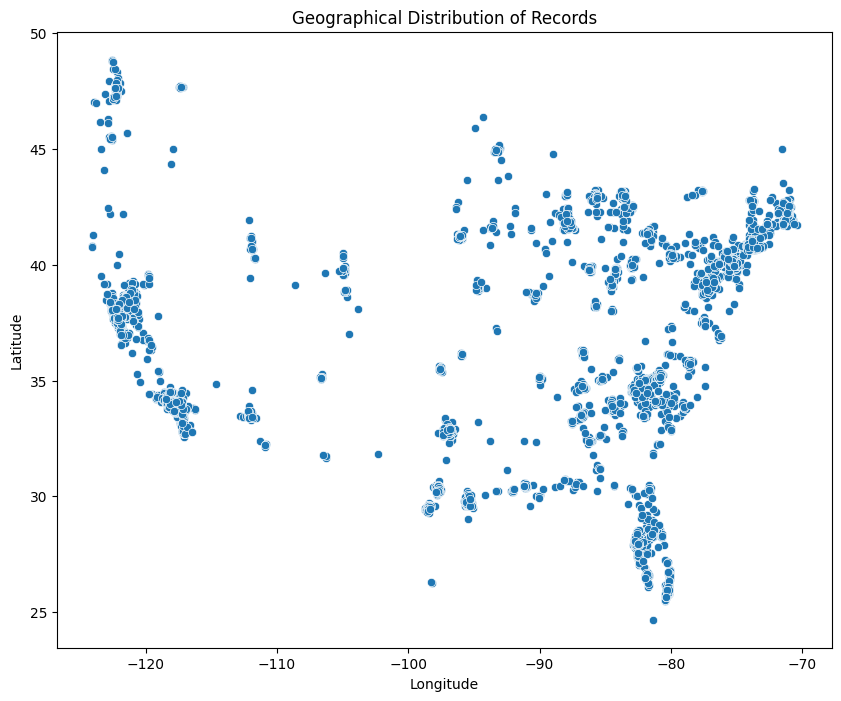

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=df.sample(5000))  # أخذ عينة لتسريع الرسم
plt.title("Geographical Distribution of Records")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


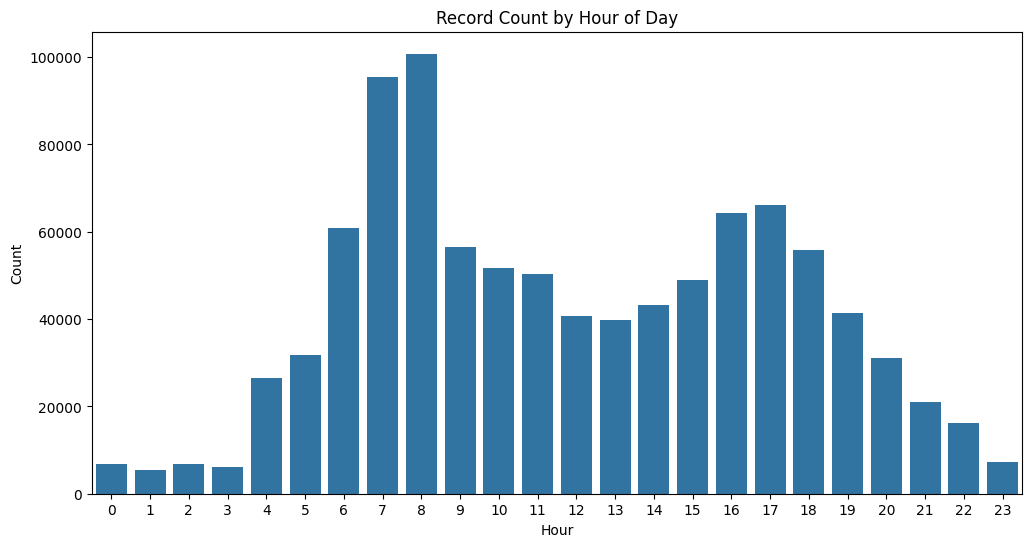

In [17]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

plt.figure(figsize=(12,6))
df['hour'] = df['Start_Time'].dt.hour
sns.countplot(x="hour", data=df)
plt.title("Record Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


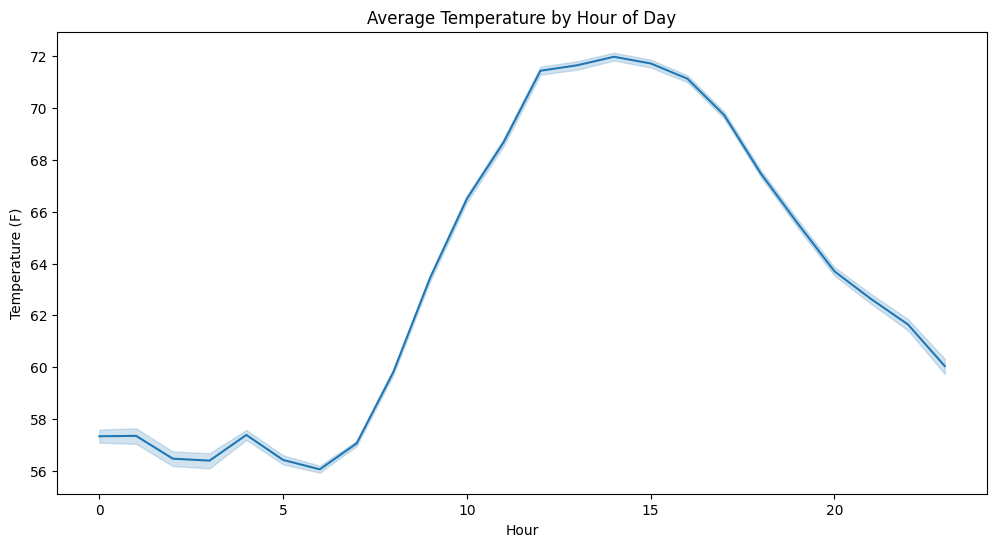

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x="hour", y="Temperature(F)", data=df)
plt.title("Average Temperature by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Temperature (F)")
plt.show()


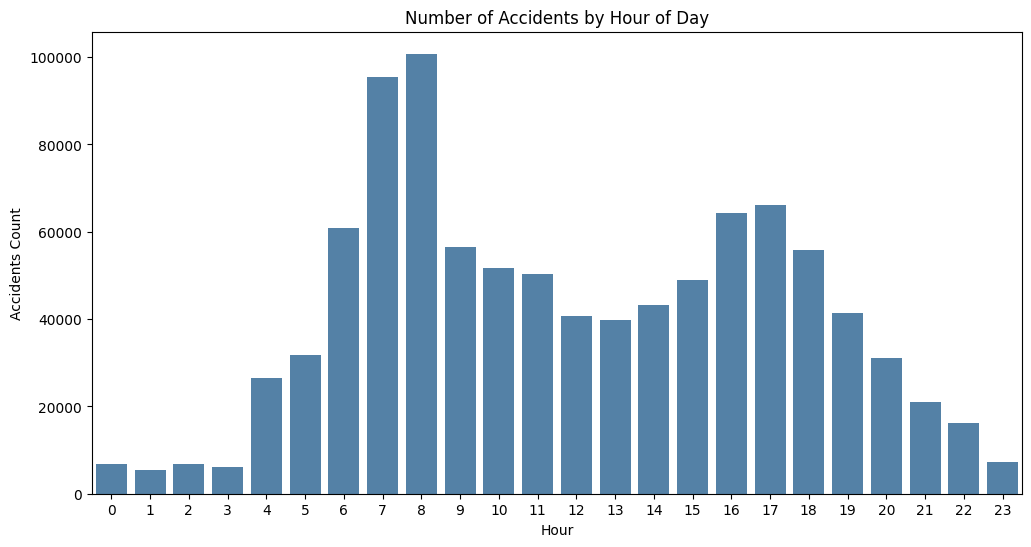

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['hour'] = df['Start_Time'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(x="hour", data=df, color="steelblue")
plt.title("Number of Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accidents Count")
plt.show()


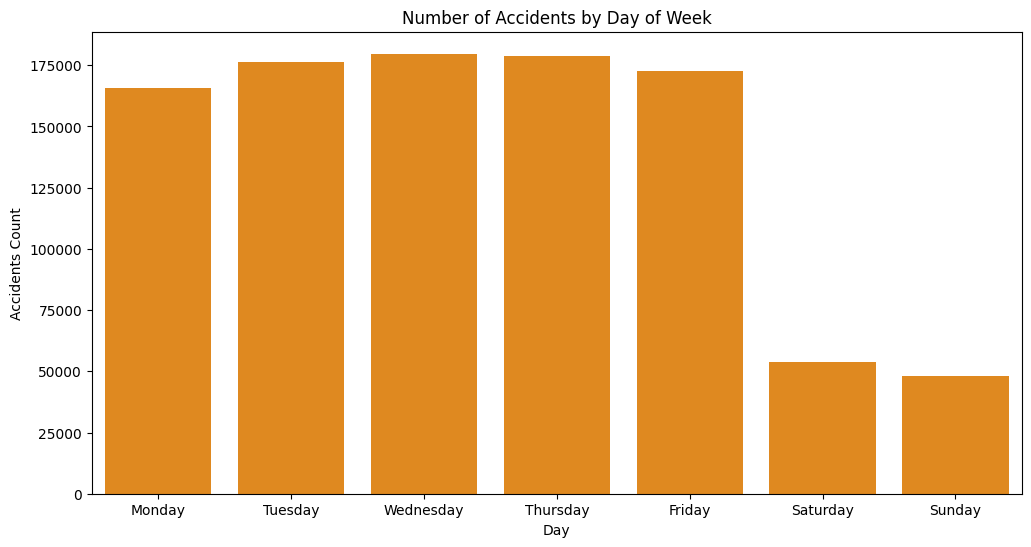

In [20]:
df['day_of_week'] = df['Start_Time'].dt.day_name()

plt.figure(figsize=(12,6))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x="day_of_week", data=df, order=order, color="darkorange")
plt.title("Number of Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Accidents Count")
plt.show()


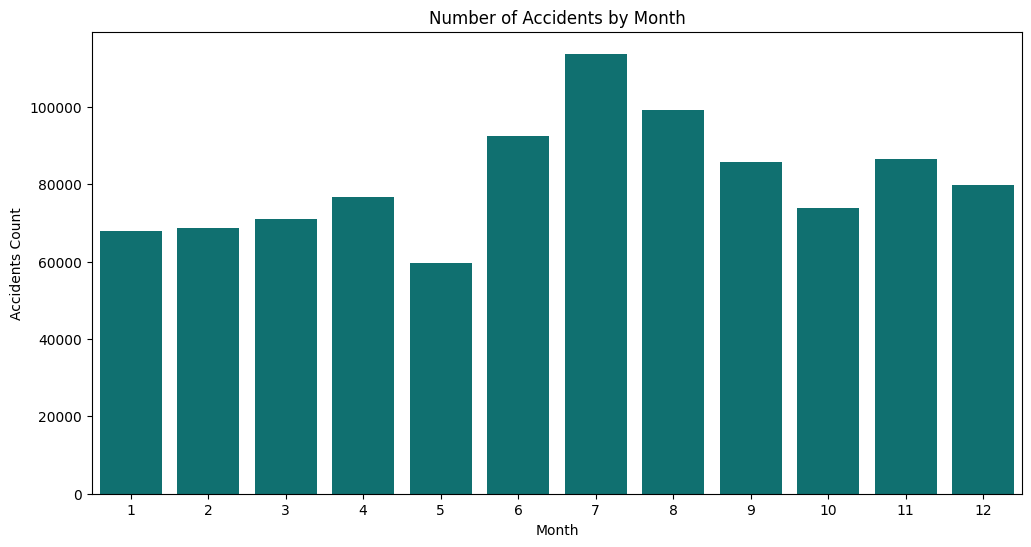

In [21]:
df['month'] = df['Start_Time'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(x="month", data=df, color="teal")
plt.title("Number of Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Accidents Count")
plt.show()


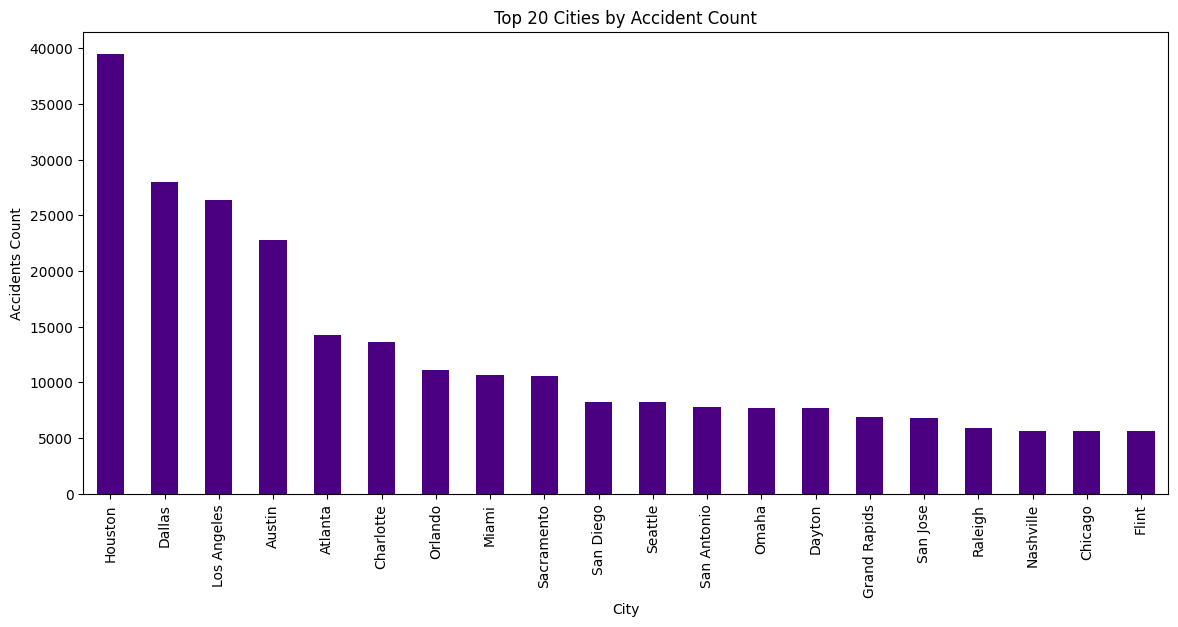

In [22]:
plt.figure(figsize=(14,6))
df['City'].value_counts().head(20).plot(kind='bar', color="indigo")
plt.title("Top 20 Cities by Accident Count")
plt.xlabel("City")
plt.ylabel("Accidents Count")
plt.show()


/tmp/ipython-input-4020383325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data=df, order=df['State'].value_counts().index[:20], palette="coolwarm")


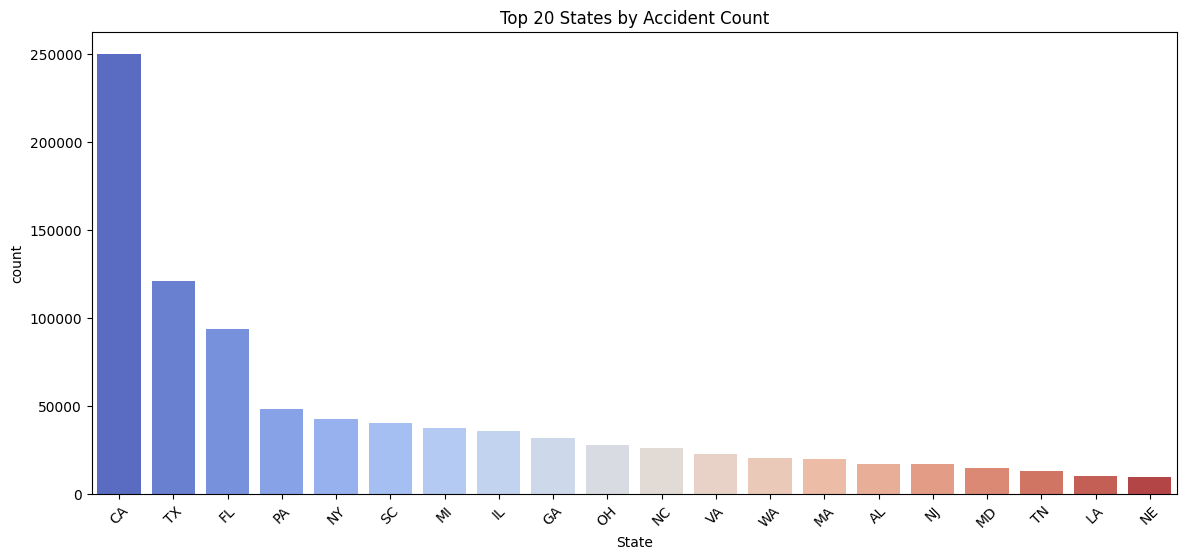

In [23]:
plt.figure(figsize=(14,6))
sns.countplot(x="State", data=df, order=df['State'].value_counts().index[:20], palette="coolwarm")
plt.title("Top 20 States by Accident Count")
plt.xticks(rotation=45)
plt.show()


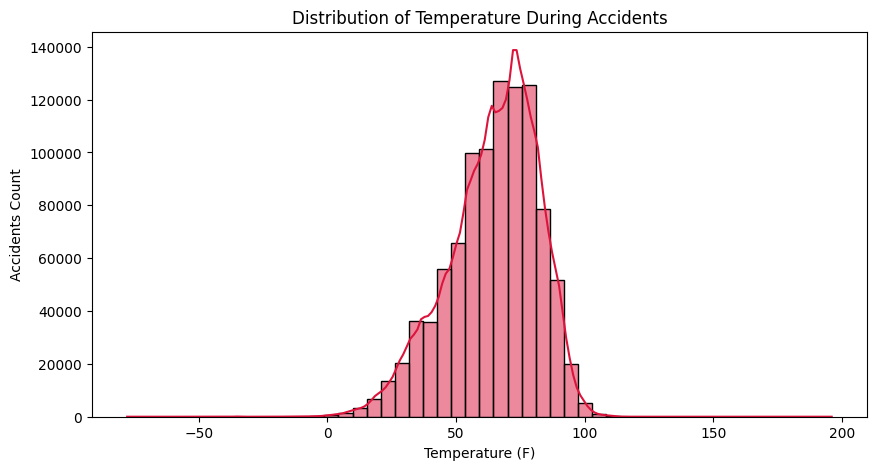

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df['Temperature(F)'].dropna(), bins=50, kde=True, color="crimson")
plt.title("Distribution of Temperature During Accidents")
plt.xlabel("Temperature (F)")
plt.ylabel("Accidents Count")
plt.show()


/tmp/ipython-input-1831907010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hour", y="Temperature(F)", data=df, palette="viridis")


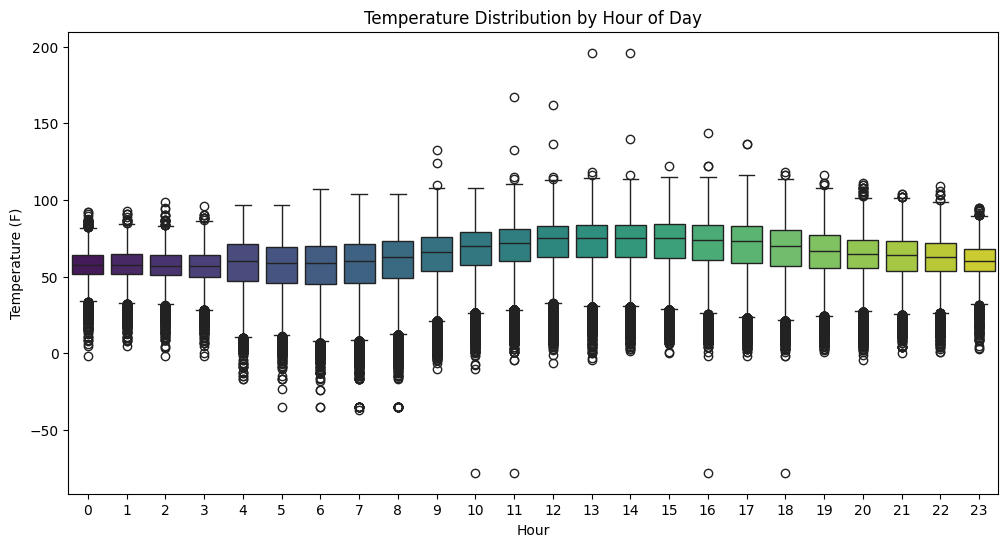

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x="hour", y="Temperature(F)", data=df, palette="viridis")
plt.title("Temperature Distribution by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Temperature (F)")
plt.show()


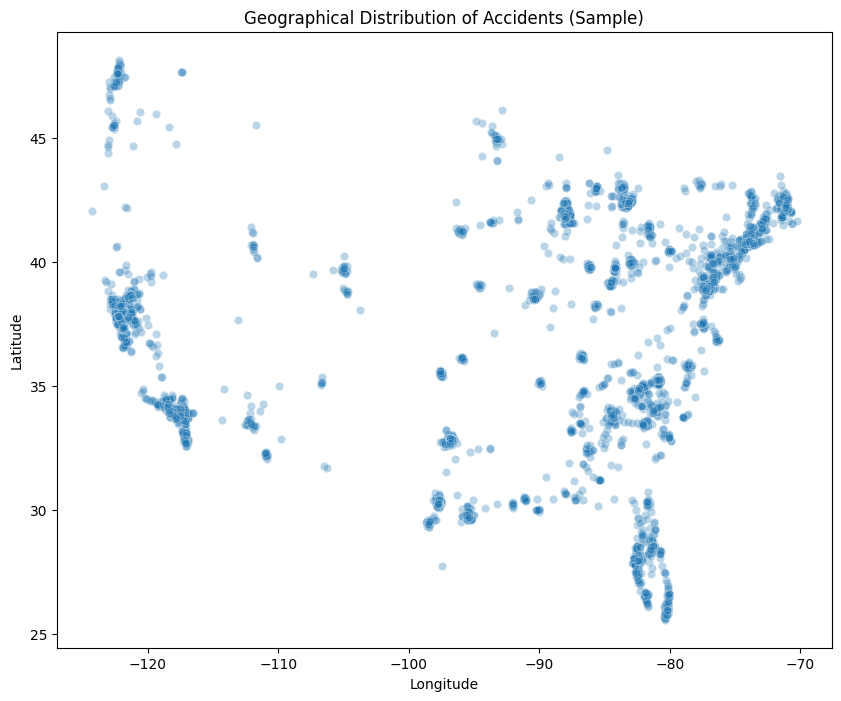

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=df.sample(5000), alpha=0.3)
plt.title("Geographical Distribution of Accidents (Sample)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


/tmp/ipython-input-1477692284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_day", data=df, palette="Set2")


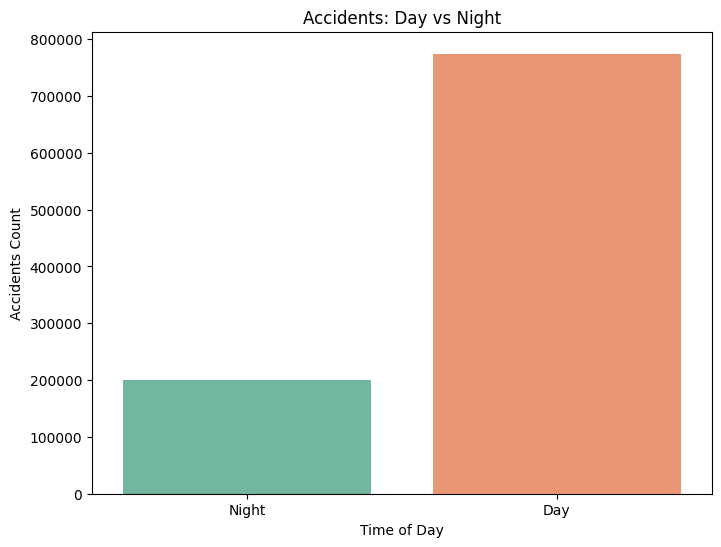

In [27]:
df['is_day'] = df['hour'].apply(lambda h: 'Day' if 6 <= h <= 18 else 'Night')

plt.figure(figsize=(8,6))
sns.countplot(x="is_day", data=df, palette="Set2")
plt.title("Accidents: Day vs Night")
plt.xlabel("Time of Day")
plt.ylabel("Accidents Count")
plt.show()


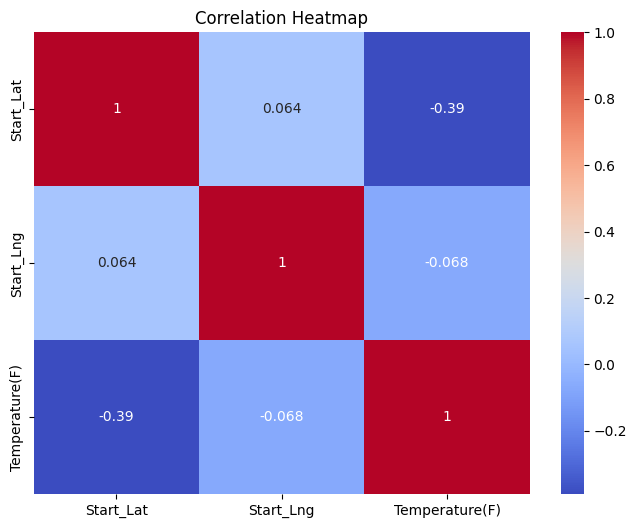

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Start_Lat','Start_Lng','Temperature(F)']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
